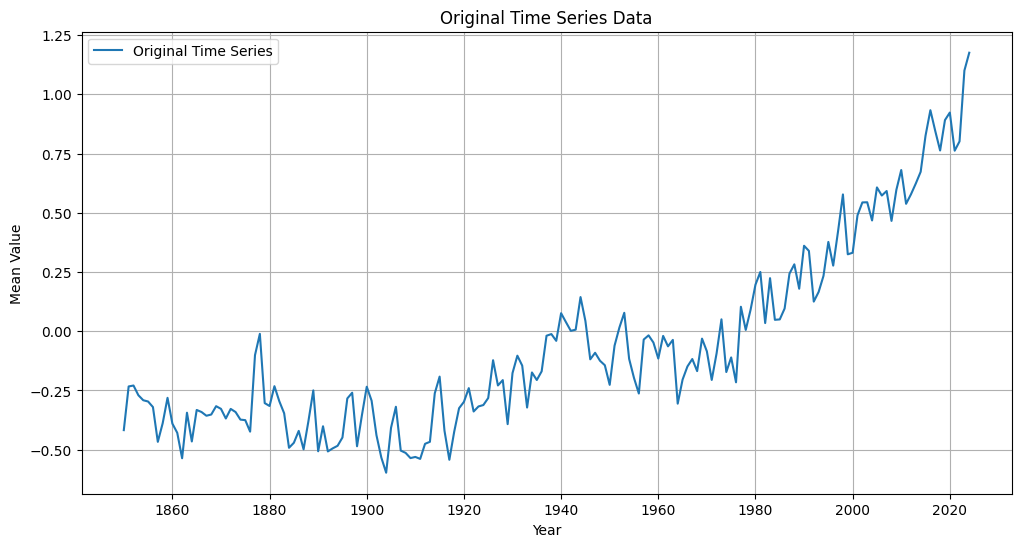

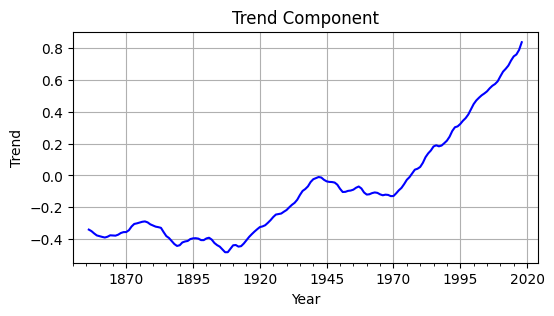

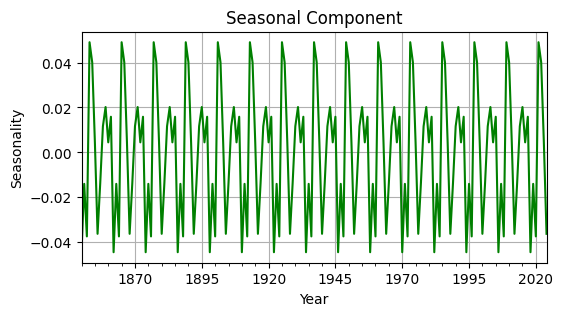

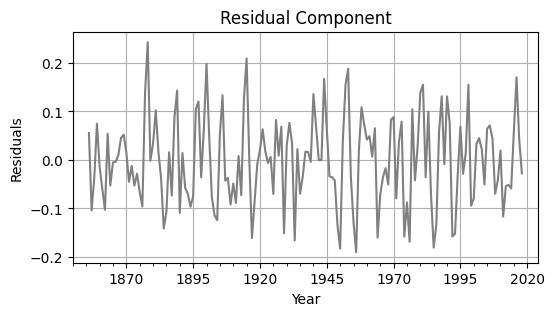

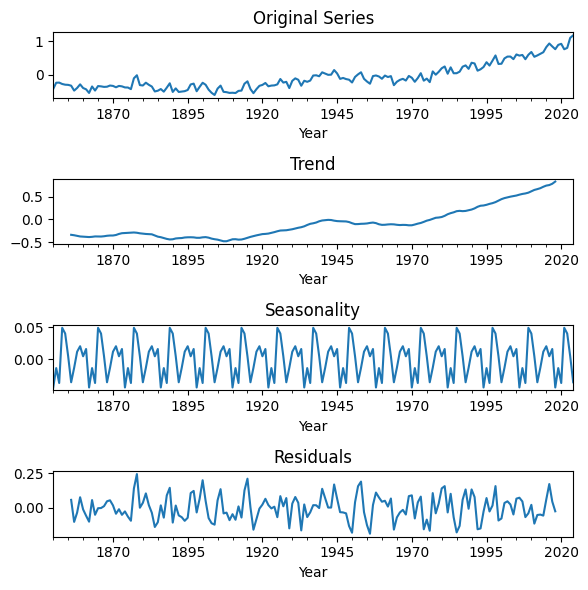

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your time series data
filepath = 'C://Users//Jayashrinidhi V//OneDrive//Documents//VScode//TimeSeriesAnalysis//globaltemp.csv'  # Replace with your actual file path
df = pd.read_csv(filepath, parse_dates=['Year'])
df.set_index('Year', inplace=True)

# Remove duplicate indices
df = df[~df.index.duplicated(keep='first')]

# Ensure column selection for plotting
if 'Mean' not in df.columns:
    raise ValueError("Column 'Mean' not found in the dataset. Check the CSV file.")

# Plot 1: Original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mean'], label='Original Time Series')
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.title("Original Time Series Data")
plt.legend()
plt.grid()
plt.show()

# Decomposition - Additive Model
decomposition = seasonal_decompose(df['Mean'], model='additive', period=12)

# Plot 2: Trend Component
plt.figure(figsize=(6, 3))
decomposition.trend.plot(title='Trend Component', color='blue')
plt.xlabel("Year")
plt.ylabel("Trend")
plt.grid()
plt.show()

# Plot 3: Seasonal Component
plt.figure(figsize=(6,3))
decomposition.seasonal.plot(title='Seasonal Component', color='green')
plt.xlabel("Year")
plt.ylabel("Seasonality")
plt.grid()
plt.show()

# Plot 4: Residuals
plt.figure(figsize=(6,3))
decomposition.resid.plot(title='Residual Component', color='gray')
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.grid()
plt.show()

# Plot 5: Combined decomposition layout
fig, axs = plt.subplots(4, 1, figsize=(6,6))
df['Mean'].plot(ax=axs[0], title='Original Series')
decomposition.trend.plot(ax=axs[1], title='Trend')
decomposition.seasonal.plot(ax=axs[2], title='Seasonality')
decomposition.resid.plot(ax=axs[3], title='Residuals')
plt.tight_layout()
plt.show()
